# EDA Earthquake o Terremoto

Usando dataset ../../Data/02ParaLimpiar/02desastres_paralimpiar.csv

## Objetivo

### Identificar condiciones y patrones relacionadas a terremotos

## Importar librerías

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 40)
import matplotlib.pyplot as plt
import seaborn as sns
import folium

## Cargar datos

In [2]:
df = pd.read_csv('../../Data/02ParaLimpiar/02desastres_paralimpiar.csv', encoding='utf-8', delimiter=';', engine='python')

# Verificar carga de dataset

##  Resumen básico shape, info, head

In [3]:
df.shape
# Resultado: 16636 filas y 26 columnas)

(16636, 26)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16636 entries, 0 to 16635
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dis No             16636 non-null  object 
 1   Year               16636 non-null  int64  
 2   Seq                16636 non-null  int64  
 3   Disaster Subgroup  16636 non-null  object 
 4   Disaster Type      16636 non-null  object 
 5   Disaster Subtype   13313 non-null  object 
 6   Country            16636 non-null  object 
 7   ISO                16636 non-null  object 
 8   Region             16636 non-null  object 
 9   Continent          16636 non-null  object 
 10  Location           14825 non-null  object 
 11  Origin             4085 non-null   object 
 12  Associated Dis     3593 non-null   object 
 13  Dis Mag Value      5064 non-null   float64
 14  Dis Mag Scale      15416 non-null  object 
 15  Latitude           2775 non-null   object 
 16  Longitude          277

In [5]:
df.head(20)

,Dis No,Year,Seq,Disaster Subgroup,Disaster Type,Disaster Subtype,Country,ISO,Region,Continent,...,Longitude,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,Total Affected,Total Damages Adj
0,1900-9002-CPV,1900,9002,Climatological,Drought,Drought,Cabo Verde,CPV,Western Africa,Africa,...,NaN,1900,NaN,NaN,1900,NaN,NaN,11000.0,NaN,NaN
1,1900-9001-IND,1900,9001,Climatological,Drought,Drought,India,IND,Southern Asia,Asia,...,NaN,1900,NaN,NaN,1900,NaN,NaN,1250000.0,NaN,NaN
2,1902-0012-GTM,1902,12,Geophysical,Earthquake,Ground movement,Guatemala,GTM,Central America,Americas,...,-91,1902,4.0,18.0,1902,4.0,18.0,2000.0,NaN,843726.0
3,1902-0003-GTM,1902,3,Geophysical,Volcanic activity,Ash fall,Guatemala,GTM,Central America,Americas,...,NaN,1902,4.0,8.0,1902,4.0,8.0,1000.0,NaN,NaN
4,1902-0010-GTM,1902,10,Geophysical,Volcanic activity,Ash fall,Guatemala,GTM,Central America,Americas,...,NaN,1902,10.0,24.0,1902,10.0,24.0,6000.0,NaN,NaN
5,1903-0006-CAN,1903,6,Geophysical,Mass movement (dry),Rockfall,Canada,CAN,Northern America,Americas,...,NaN,1903,4.0,29.0,1903,4.0,29.0,76.0,23.0,NaN
6,1903-0012-COM,1903,12,Geophysical,Volcanic activity,Ash fall,Comoros (the),COM,Eastern Africa,Africa,...,NaN,1903,NaN,NaN,1903,NaN,NaN,17.0,NaN,NaN
7,1904-0003-BGD,1904,3,Meteorological,Storm,Tropical cyclone,Bangladesh,BGD,Southern Asia,Asia,...,NaN,1904,11.0,NaN,1904,11.0,NaN,NaN,NaN,NaN
8,1905-0005-CAN,1905,5,Geophysical,Mass movement (dry),Rockfall,Canada,CAN,Northern America,Americas,...,NaN,1905,8.0,13.0,1905,8.0,13.0,18.0,18.0,NaN
9,1905-0003-IND,1905,3,Geophysical,Earthquake,Ground movement,India,IND,Southern Asia,Asia,...,76.16,1905,4.0,4.0,1905,4.0,4.0,20000.0,NaN,812477.0


## Columns

In [6]:
df.columns

Index(['Dis No', 'Year', 'Seq', 'Disaster Subgroup', 'Disaster Type',
       'Disaster Subtype', 'Country', 'ISO', 'Region', 'Continent', 'Location',
       'Origin', 'Associated Dis', 'Dis Mag Value', 'Dis Mag Scale',
       'Latitude', 'Longitude', 'Start Year', 'Start Month', 'Start Day',
       'End Year', 'End Month', 'End Day', 'Total Deaths', 'Total Affected',
       'Total Damages Adj'],
      dtype='object')

# Earthquake filter

### Filtro principal para Earthquake
Selecciona solo las filas en el DataFrame donde la columna 'Disaster Type' es 'Earthquake'.

In [7]:
# Filtro principal para Earthquake
earthquake_filter = (df['Disaster Type'] == 'Earthquake')
earthquake_filter

0        False
1        False
2         True
3        False
4        False
         ...  
16631    False
16632    False
16633    False
16634    False
16635    False
Name: Disaster Type, Length: 16636, dtype: bool

### Categorías de condiciones asociadas al filtro Earthquake: geográficas, magnitud, geolocalización, temporales, etc.

In [8]:
# Categorías geográficas de Earthquake
earthquake_geographical_data = df[earthquake_filter][['Location', 'ISO', 'Country', 'Region', 'Continent']]

# Categorías de magnitud de Earthquake
earthquake_magnitude_data = df[earthquake_filter][['Dis Mag Scale', 'Dis Mag Value']]

# Categorías de geolocalización de Earthquake
earthquake_geolocation_data = df[earthquake_filter][['Latitude', 'Longitude']]

# Categorías de fecha de Earthquake
earthquake_datetime_data = df[earthquake_filter][['Start Month', 'Start Year', 'End Year', 'End Year']]

# Filtros extras para otras categorías relacionadas con Earthquake
# Considerar y activar solo en caso necesario, cambiando nombre Category por otro

## Análisis geográfico de terremotos

In [9]:
earthquake_geographical_data.shape
earthquake_geographical_data.info

<bound method DataFrame.info of                                                 Location  ISO  \
2                              Quezaltenango, San Marcos  GTM   
9                                                 Kangra  IND   
10                                            Valparaiso  CHL   
11                                                Tumako  COL   
15                                             Tien Shan  CHN   
...                                                  ...  ...   
16610                                                NaN  SYR   
16611                                          Northwest  SYR   
16614                                     Sughd province  TJK   
16616  Defne District (Hatay Province, southern T�rkiye)  TUR   
16617              Yesilyurt District (Malatya province)  TUR   

                    Country           Region Continent  
2                 Guatemala  Central America  Americas  
9                     India    Southern Asia      Asia  
10              

### Distribución geográfica de terremotos

#### Value counts: Contar ocurrencias de terremotos en diferentes localizaciones, países, regiones y continentes


#### Continent

In [10]:
continent_counts = earthquake_geographical_data['Continent'].value_counts()
continent_counts

Asia        937
Americas    326
Europe      203
Africa       74
Oceania      57
Name: Continent, dtype: int64

#### Region

In [11]:
region_counts = earthquake_geographical_data['Region'].value_counts()
region_counts

Eastern Asia                 309
Southern Asia                258
South-Eastern Asia           205
South America                154
Western Asia                 138
Southern Europe              132
Central America              107
Northern America              46
Melanesia                     38
Northern Africa               35
Eastern Europe                29
Central Asia                  27
Eastern Africa                27
Russian Federation            26
Caribbean                     19
Australia and New Zealand     13
Western Europe                11
Northern Europe                5
Polynesia                      5
Middle Africa                  5
Southern Africa                5
Western Africa                 2
Micronesia                     1
Name: Region, dtype: int64

#### Country

In [12]:
country_counts = earthquake_geographical_data['Country'].value_counts()
country_counts

China                         203
Indonesia                     145
Iran (Islamic Republic of)    137
Turkey                        114
Japan                          70
                             ... 
Turkmenistan                    1
Serbia Montenegro               1
Burundi                         1
Dominica                        1
Wallis and Futuna               1
Name: Country, Length: 125, dtype: int64

#### Location

In [13]:
location_counts = earthquake_geographical_data['Location'].value_counts()
location_counts

Yunnan province                                                           14
Sichuan province                                                           8
Managua                                                                    4
Tainan                                                                     3
Yingjiang area (Dehong Dai and Jingpo district, Yunnan Sheng province)     3
                                                                          ..
Bangkejeren, Kutacane, Medan area (North Sumatra)                          1
Salima district                                                            1
Near coast of Guerrero                                                     1
Fars,Yasuj, Kohkiluyeh-Boyer Ahmad provinces                               1
Yesilyurt District (Malatya province)                                      1
Name: Location, Length: 1474, dtype: int64

## Visualizar la distribución geográfica de terremotos a partir de value_counts usando bar charts o countplot

In [14]:
# Establecer tamaño de fuente a 7
plt.rcParams.update({'font.size': 7})

### Distribución de terremotos por continente

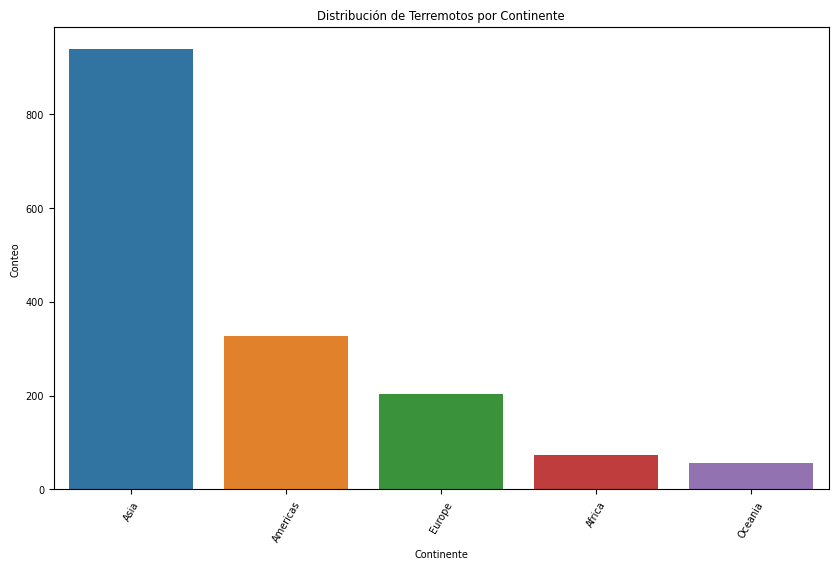

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(x=continent_counts.index, y=continent_counts.values)
plt.title('Distribución de Terremotos por Continente')
plt.xlabel('Continente')
plt.ylabel('Conteo')
plt.xticks(rotation=60)
plt.show()

Insights sobre terremotos en continentes: Asia es el continente donde más terremotos ha habido muy por encima del resto: 937. Seguido por América: 326, Europa: 203 y con valores bastante inferiores: África 74 y Oceanía 57.

### Region

#### Distribución de terremotos por región

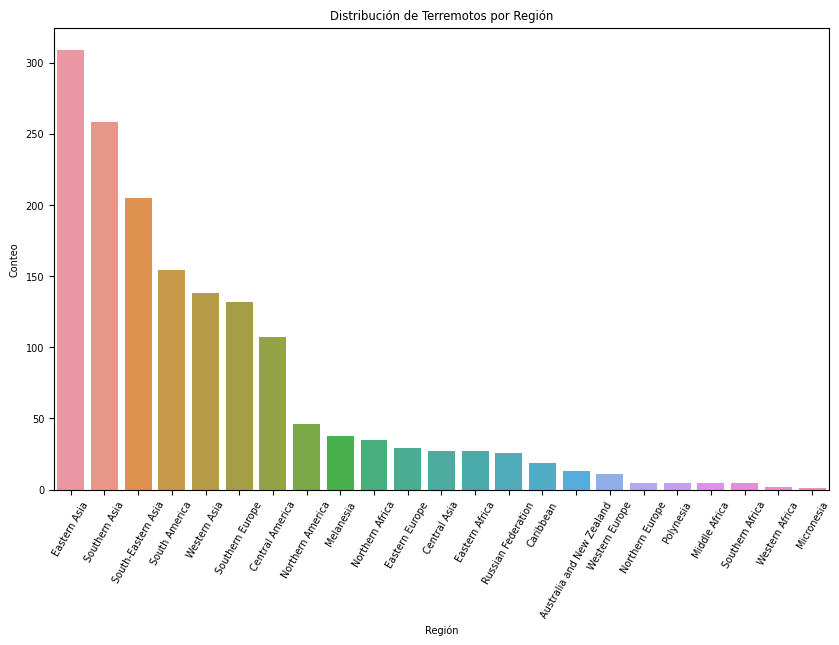

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(x=region_counts.index, y=region_counts.values)
plt.title('Distribución de Terremotos por Región')
plt.xlabel('Región')
plt.ylabel('Conteo')
plt.xticks(rotation=60)
plt.show()

Insights sobre terremotos en regiones: A excepción de Asia Central, todas las regiones de Asia superan al resto de regiones en cuanto a existencia de terremotos. Eastern Asia es la región con más terremotos.

### Country

#### Distribución de terremotos por país

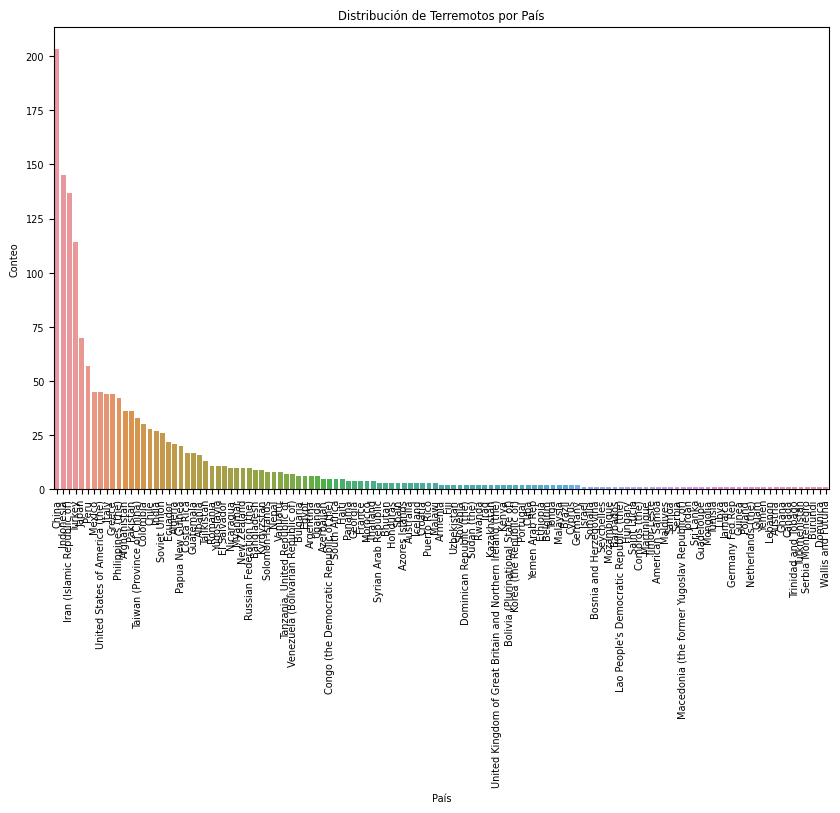

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x=country_counts.index, y=country_counts.values)
plt.title('Distribución de Terremotos por País')
plt.xlabel('País')
plt.ylabel('Conteo')
plt.xticks(rotation=90)
plt.show()

# Reducir tamaño de fuente
font = {'size': 5}
plt.rc('font', **font)

In [18]:
# Sintetizar la información anterior en top 20 para mejorar visualización
top20_eq_countries = earthquake_geographical_data['Country'].value_counts().head(20)
top20_eq_countries

China                             203
Indonesia                         145
Iran (Islamic Republic of)        137
Turkey                            114
Japan                              70
Peru                               57
Mexico                             45
United States of America (the)     45
Italy                              44
Greece                             44
Philippines (the)                  42
Afghanistan                        36
Pakistan                           36
Taiwan (Province of China)         33
Colombia                           30
Chile                              28
India                              27
Soviet Union                       26
Ecuador                            22
Algeria                            21
Name: Country, dtype: int64

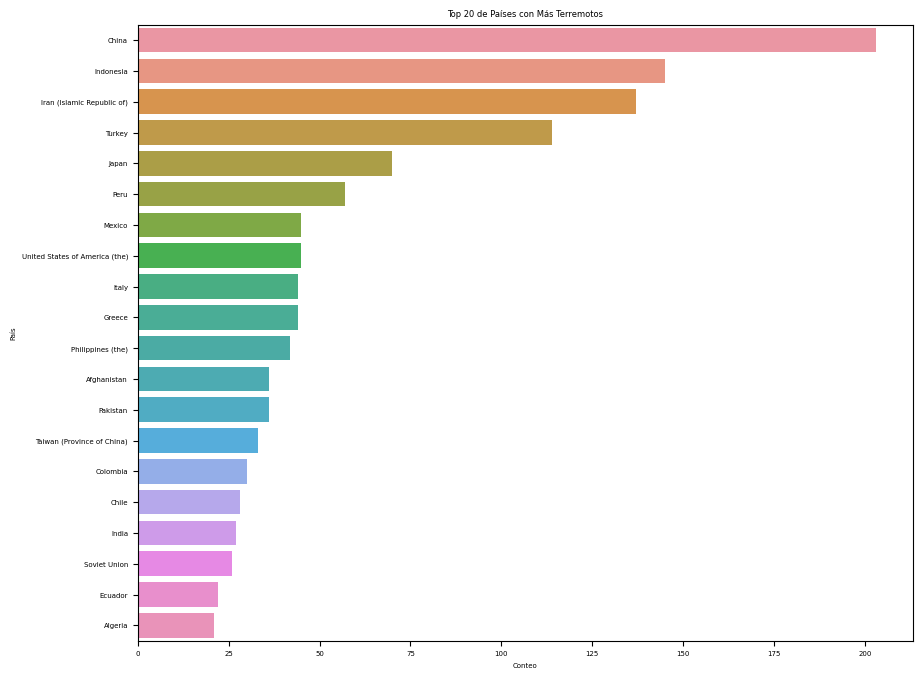

In [19]:
plt.figure(figsize=(10, 8))
sns.barplot(x=top20_eq_countries.values, y=top20_eq_countries.index)
plt.title('Top 20 de Países con Más Terremotos')
plt.xlabel('Conteo')
plt.ylabel('País')
plt.show()

# Aumentar tamaño de fuente
font = {'size': 10}
plt.rc('font', **font)


### Location

#### Distribución de terremotos por localidad

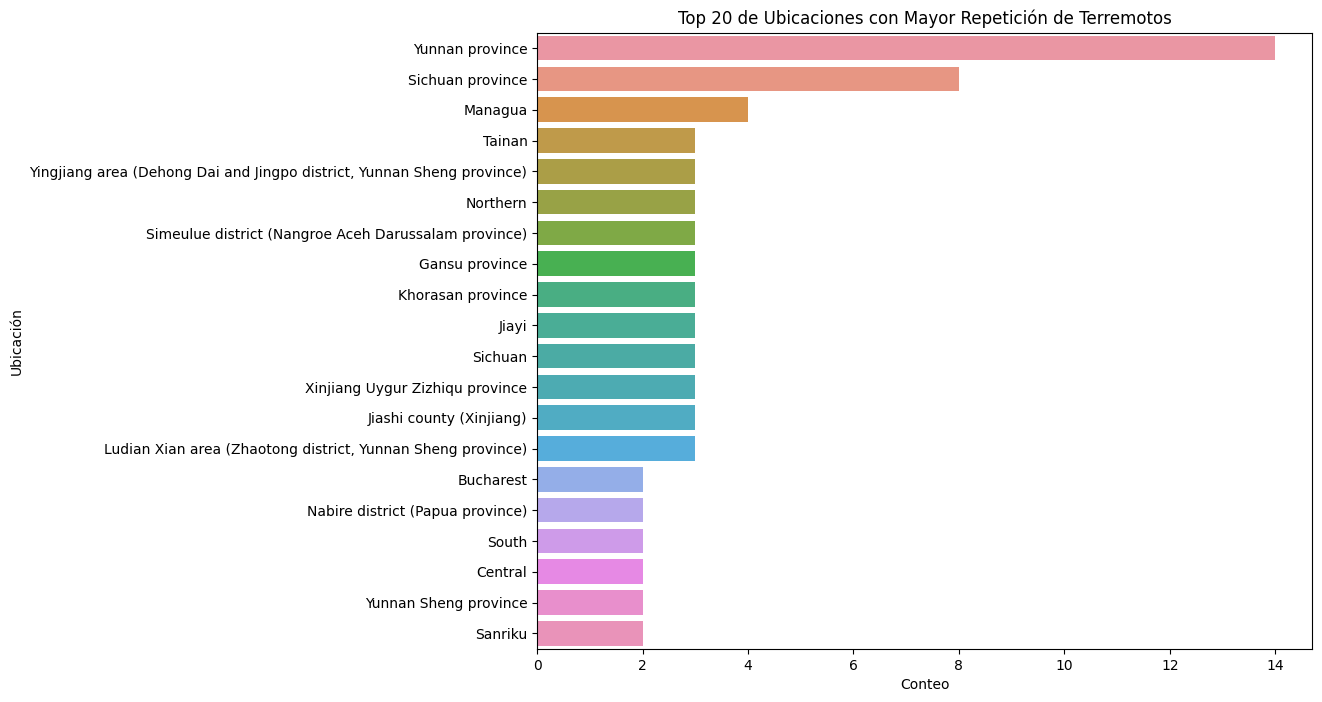

In [20]:
plt.figure(figsize=(10, 8))
sns.countplot(y=earthquake_geographical_data['Location'], order=earthquake_geographical_data['Location'].value_counts().head(20).index)
plt.title('Top 20 de Ubicaciones con Mayor Repetición de Terremotos')
plt.xlabel('Conteo')
plt.ylabel('Ubicación')
plt.show()

y=earthquake_geographical_data['Location']: Especifica la variable que se trazará en el eje y. En este caso, queremos mostrar las ubicaciones de los terremotos.

order=earthquake_geographical_data['Location'].value_counts().head(20).index: este parámetro especifica el orden en el que deben aparecer las categorías en el eje y. Usamos el método value_counts() para obtener el recuento de ocurrencias para cada ubicación, luego usamos head(20) para seleccionar las 20 ubicaciones principales y, finalmente, .index se usa para extraer el índice (ubicaciones) de la serie resultante. Esto asegura que las ubicaciones con el conteo más alto se mostrarán en la parte superior de la gráfica.

### Repetición de terremotos por localidades

In [21]:
location_counts = earthquake_geographical_data['Location'].value_counts()
repeated_eq_locations = location_counts[location_counts > 1]
repeated_eq_locations
top20_repeated_eq_locations = repeated_eq_locations.head(20)
top20_repeated_eq_locations

Yunnan province                                                           14
Sichuan province                                                           8
Managua                                                                    4
Tainan                                                                     3
Yingjiang area (Dehong Dai and Jingpo district, Yunnan Sheng province)     3
Northern                                                                   3
Simeulue district (Nangroe Aceh Darussalam province)                       3
Gansu province                                                             3
Khorasan province                                                          3
Jiayi                                                                      3
Sichuan                                                                    3
Xinjiang Uygur Zizhiqu province                                            3
Jiashi county (Xinjiang)                                                   3

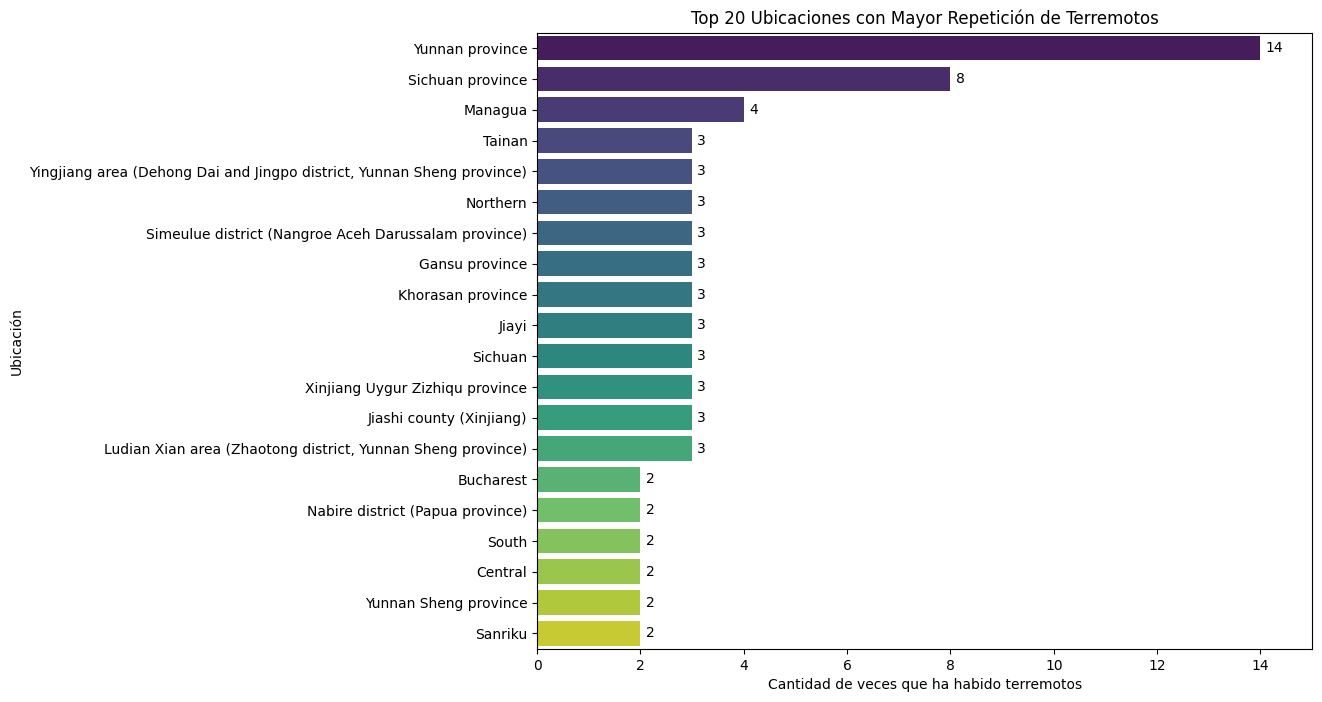

In [22]:
plt.figure(figsize=(10, 8))
ax = sns.barplot(x=top20_repeated_eq_locations.values, y=top20_repeated_eq_locations.index, palette='viridis')
ax.set_xlim(0, max(top20_repeated_eq_locations.values) + 1)
for i, count in enumerate(top20_repeated_eq_locations.values):
    ax.text(count + 0.1, i, int(count), ha='left', va='center')
plt.title('Top 20 Ubicaciones con Mayor Repetición de Terremotos')
plt.xlabel('Cantidad de veces que ha habido terremotos')
plt.ylabel('Ubicación')
plt.show()

Insights sobre repetición de terremotos en localidades:
1. La localidad donde más terremotos se han repetido es Yunan Province, en 14 ocasiones.
2. Le sigue Sichuan Province, otra localidad también en China, con 8. Sería interesante comprobar si se encuentran en la misma región.
3. Managua en Filipina es la tercera localidad con 4 repeticiones.

Con respecto al uso de reset_index, se usa en este código para garantizar que el índice de los DataFrames resultantes comience desde 0 y sea continuo sin espacios. No es necesario para el funcionamiento del mapa en sí, pero puede ayudar a indexar y hacer referencia a los datos de manera limpia y coherente, evitando errores.

El uso de reset_index no afecta al DataFrame principal (df) en sí. Crea nuevos DataFrames (earthquake_geographical_data y earthquake_geolocation_data) que contienen los datos filtrados y procesados ​​específicos de los terremotos. Estas nuevas variables están separadas del marco de datos principal y contienen la información relacionada con el terremoto extraída de él.

# Conclusiones

# Recomendaciones

# Guardar dataset en csv

In [23]:
# df.to_csv('../../Data/02ParaLimpiar/02desastres_fillna.csv', index=False, sep=';', encoding='utf-8')

Dataset con valores rellenados y/o filas vacías borradas.